#Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)




              Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
2

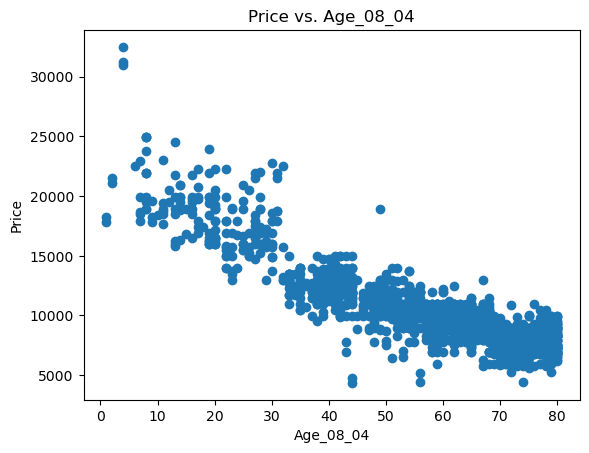

Mean Absolute Error (MAE): 1014.5276960479525
Mean Squared Error (MSE): 2171409.719724481
R-squared: 0.8431215168408184


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')

# Selecting the relevant columns
selected_columns = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
corolla = data[selected_columns]

# Data Exploration
print(corolla.describe())

plt.scatter(corolla["Age_08_04"], corolla["Price"])
plt.xlabel("Age_08_04")
plt.ylabel("Price")
plt.title("Price vs. Age_08_04")
plt.show()

# Splitting the data into training and testing sets
X = corolla.drop("Price", axis=1)
y = corolla["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

#  Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


                              Model  R-squared (R^2)
0                           Model 1         0.898727
1         Model 2 (Log Transformed)         0.898727
2  Model 3 (Scaled Marketing Spend)         0.898727


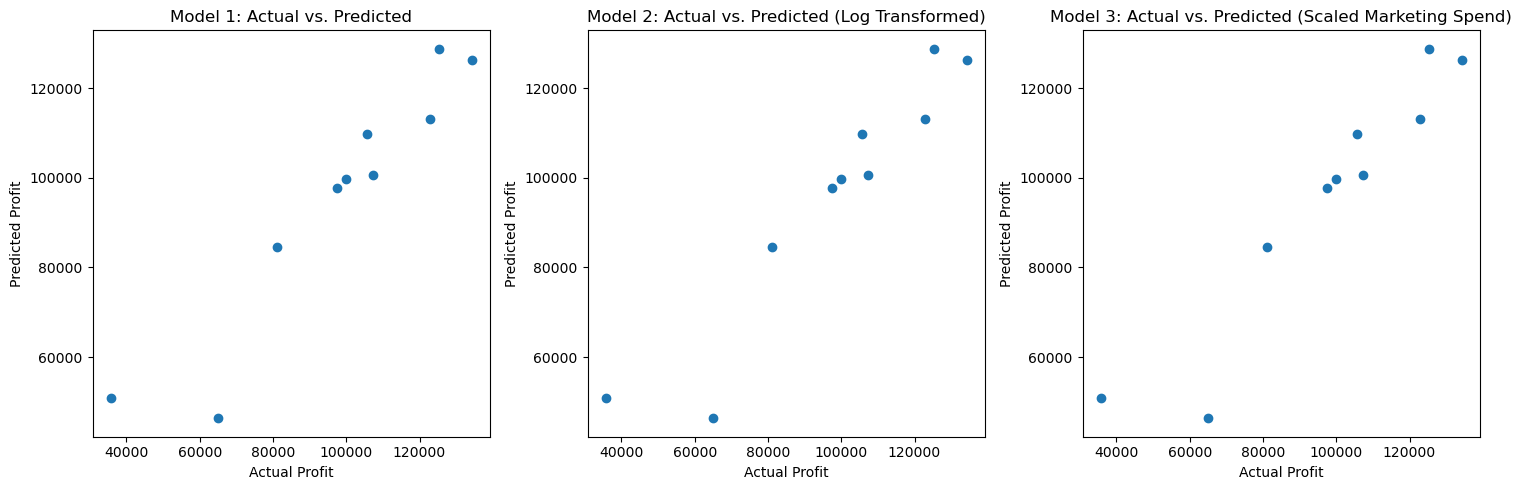

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


data = pd.read_csv('50_Startups.csv')


X = data.iloc[:, :-1]  # Exclude the 'Profit' column
y = data['Profit']

# Encoding the 'State' column using one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['State'])
    ],
    remainder='passthrough'
)

X = column_transformer.fit_transform(X)

# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a list to store R-squared values for each model
r2_values = []

# Model 1: Linear Regression without any transformations
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
r2_values.append(('Model 1', r2_score(y_test, y_pred1)))

# Model 2: Linear Regression with log-transformed 'R&D Spend'
X_train_log = X_train.copy()
X_test_log = X_test.copy()
X_train_log[:, 0] = np.log(X_train_log[:, 0] + 1)  # Adding 1 to avoid log(0)
X_test_log[:, 0] = np.log(X_test_log[:, 0] + 1)

model2 = LinearRegression()
model2.fit(X_train_log, y_train)
y_pred2 = model2.predict(X_test_log)
r2_values.append(('Model 2 (Log Transformed)', r2_score(y_test, y_pred2)))

# Model 3: Linear Regression with scaled 'Marketing Spend'
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[:, 3] = scaler.fit_transform(X_train_scaled[:, 3].reshape(-1, 1)).flatten()
X_test_scaled[:, 3] = scaler.transform(X_test_scaled[:, 3].reshape(-1, 1)).flatten()

model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(X_test_scaled)
r2_values.append(('Model 3 (Scaled Marketing Spend)', r2_score(y_test, y_pred3)))

#  table of R-squared values
r2_table = pd.DataFrame(r2_values, columns=['Model', 'R-squared (R^2)'])


print(r2_table)

# Visualizing the predictions for each model
plt.figure(figsize=(15, 5))

# Model 1
plt.subplot(131)
plt.scatter(y_test, y_pred1)
plt.title('Model 1: Actual vs. Predicted')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

# Model 2
plt.subplot(132)
plt.scatter(y_test, y_pred2)
plt.title('Model 2: Actual vs. Predicted (Log Transformed)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

# Model 3
plt.subplot(133)
plt.scatter(y_test, y_pred3)
plt.title('Model 3: Actual vs. Predicted (Scaled Marketing Spend)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

plt.tight_layout()
plt.show()
